In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/SI699/100.zip" -d "/content"

In [ ]:
### train_48.zip -> training set of image size 48*48
### validation_48.zip -> validation set of image size 48*48

In [ ]:
!pip install keras==2.6.0
!pip install tensorflow==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.6.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import os
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 14 18:33:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


# Training Set & Testing Set

In [ ]:
# Read a sample
import cv2
folder_name = '/content/100/1/'
filename = '0' + '.jpg'
img = cv2.imread(folder_name + filename, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
print(img.shape)

(100, 100, 1)


In [ ]:
print(img[:, :, 0])

[[153 147 138 ... 174 175 177]
 [143 134 124 ... 175 177 178]
 [139 127 115 ... 178 179 180]
 ...
 [  9  11  14 ... 133 134 132]
 [  9  12  11 ... 133 133 132]
 [  6  12  10 ... 131 131 131]]


In [ ]:
def readImages(folder_name, num):
    images = []
    count = 0
    for name in os.listdir(folder_name):
      try:
        img = cv2.imread(folder_name + name, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
      except:
        print(name)
      images.append(img)
      count += 1
      if count == num:
        break
    matrix = np.stack(images, axis=0)
    return matrix

In [ ]:
images_0 = readImages('/content/100/0/', 5000)
images_1 = readImages('/content/100/1/', 5000)
images_2 = readImages('/content/100/2/', 5000)
images_3 = readImages('/content/100/3/', 5000)

.DS_Store


In [ ]:
print(images_0.shape)
print(images_1.shape)
print(images_2.shape)
print(images_3.shape)

(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)


In [ ]:
labels_0 = np.zeros((5000,1), int)
labels_1 = np.ones((5000,1), int)
labels_2 = np.zeros((5000,1), int)
labels_2.fill(2)
labels_3 = np.zeros((5000,1), int)
labels_3.fill(3)
print(labels_0.shape)
print(labels_1.shape)
print(labels_2.shape)
print(labels_3.shape)

(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)


In [ ]:
labels = np.concatenate((labels_0, labels_1, labels_2, labels_3), axis=0)
y_train_labels = to_categorical(labels)

In [ ]:
images = np.vstack((images_0, images_1, images_2, images_3))

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape)
print(y_train_labels.shape)
print(test_images.shape)
print(y_test_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(4000, 100, 100, 1)
(4000, 4)


# Validation Set

In [ ]:
!unzip "/content/drive/My Drive/SI699/Validation_100.zip" -d "/content"

In [ ]:
count = 500

In [ ]:
images_val_0 = readImages('/content/Validation_100/0/', count)
images_val_1 = readImages('/content/Validation_100/1/', count)
images_val_2 = readImages('/content/Validation_100/2/', count)
images_val_3 = readImages('/content/Validation_100/3/', count)

In [ ]:
validation_images = np.vstack((images_val_0, images_val_1, images_val_2, images_val_3))
val_images = validation_images.astype('float32') / 255

In [ ]:
labels_val_0 = np.zeros((count,1), int)
labels_val_1 = np.ones((count,1), int)
labels_val_2 = np.zeros((count,1), int)
labels_val_2.fill(2)
labels_val_3 = np.zeros((count,1), int)
labels_val_3.fill(3)
print(labels_val_0.shape)
print(labels_val_1.shape)
print(labels_val_2.shape)
print(labels_val_3.shape)

(500, 1)
(500, 1)
(500, 1)
(500, 1)


In [ ]:
print(val_images.shape)

(2000, 100, 100, 1)


In [ ]:
val_labels = np.concatenate((labels_val_0, labels_val_1, labels_val_2, labels_val_3), axis=0)

In [ ]:
y_val_labels = to_categorical(val_labels)


In [ ]:
print(train_images.shape)
print(y_train_labels.shape)
print(val_images.shape)
print(y_val_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(2000, 100, 100, 1)
(2000, 4)


# CNN 1

In [ ]:
# CNN
cnn1 = models.Sequential()
cnn1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
cnn1.add(layers.MaxPooling2D((2, 2)))
cnn1.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D((2, 2)))
cnn1.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(64, activation='relu'))
cnn1.add(layers.Dense(4, activation='softmax'))
cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [ ]:
cnn1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = cnn1.fit(train_images, y_train_labels, epochs=20, batch_size=32, verbose = True, validation_data = (val_images, y_val_labels))

Epoch 1/20
500/500 [==============================] - 6s 11ms/step - loss: 1.2088 - accuracy: 0.4319 - val_loss: 1.0699 - val_accuracy: 0.5225
Epoch 2/20
500/500 [==============================] - 5s 10ms/step - loss: 1.0268 - accuracy: 0.5591 - val_loss: 1.0085 - val_accuracy: 0.5770
Epoch 3/20
500/500 [==============================] - 5s 10ms/step - loss: 0.9522 - accuracy: 0.5963 - val_loss: 0.9608 - val_accuracy: 0.6000
Epoch 4/20
500/500 [==============================] - 5s 10ms/step - loss: 0.8882 - accuracy: 0.6267 - val_loss: 0.9438 - val_accuracy: 0.6025
Epoch 5/20
500/500 [==============================] - 5s 10ms/step - loss: 0.8325 - accuracy: 0.6528 - val_loss: 0.9568 - val_accuracy: 0.5955
Epoch 6/20
500/500 [==============================] - 5s 10ms/step - loss: 0.7881 - accuracy: 0.6743 - val_loss: 0.9256 - val_accuracy: 0.6215
Epoch 7/20
500/500 [==============================] - 5s 10ms/step - loss: 0.7296 - accuracy: 0.7016 - val_loss: 0.9622 - val_accuracy: 0.6060

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_images, y_test_labels)

125/125 [==============================] - 1s 4ms/step - loss: 2.8858 - accuracy: 0.5932


In [ ]:
predictions = cnn1.predict(test_images)

In [ ]:
def plotConfusionMatrix(predictions):
  y_pred=np.argmax(predictions, axis=1)
  y_test=np.argmax(y_test_labels, axis=1)

  confusion_matrix = metrics.confusion_matrix(y_pred, y_test, normalize='true')

  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Neutral", "Happy", "Sad", "Surprise"])
  disp.plot()

  plt.savefig("CNN1.svg")
  plt.show()

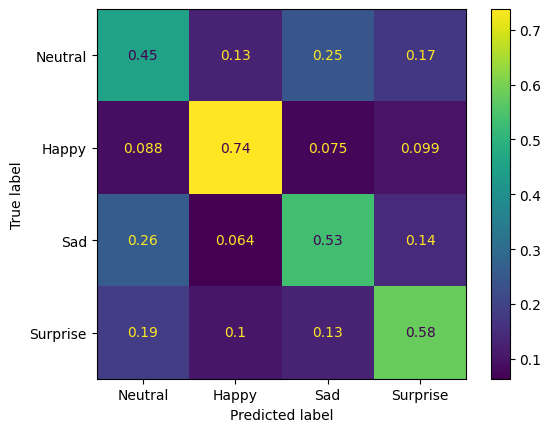

In [ ]:
plotConfusionMatrix(predictions)

In [ ]:
def plotAccuracyandLoss(history, name):
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{name} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['training', 'validation'], loc='upper left')
  plt.savefig(f"{name}_acc.svg")
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


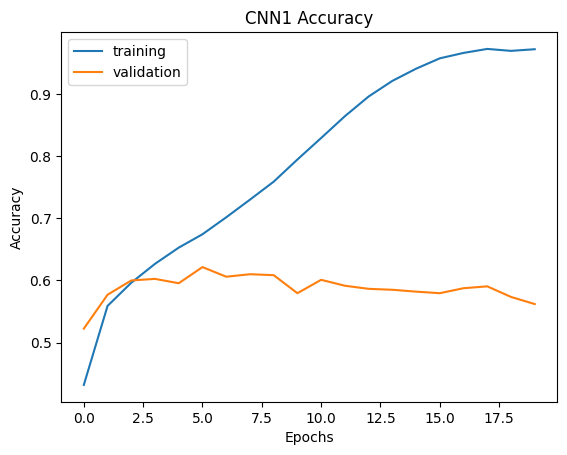

In [ ]:
plotAccuracyandLoss(history, "CNN1")

# CNN 2

In [ ]:
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))

cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation='relu'))
cnn2.add(layers.Dense(4, activation='softmax'))
cnn2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 18, 18, 64)       

In [ ]:
cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_cnn2 = cnn2.fit(train_images, y_train_labels, epochs=20, batch_size=32, verbose = True, validation_data = (val_images, y_val_labels))

Epoch 1/20
500/500 [==============================] - 8s 15ms/step - loss: 1.3635 - accuracy: 0.2916 - val_loss: 1.2257 - val_accuracy: 0.4220
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 1.1009 - accuracy: 0.5191 - val_loss: 1.0160 - val_accuracy: 0.5575
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.9863 - accuracy: 0.5781 - val_loss: 0.9488 - val_accuracy: 0.5980
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.9136 - accuracy: 0.6192 - val_loss: 0.9087 - val_accuracy: 0.6210
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.8506 - accuracy: 0.6453 - val_loss: 0.9013 - val_accuracy: 0.6280
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.7855 - accuracy: 0.6778 - val_loss: 0.8950 - val_accuracy: 0.6305
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.7174 - accuracy: 0.7076 - val_loss: 0.9303 - val_accuracy: 0.6335

In [ ]:
test_loss, test_acc = cnn2.evaluate(test_images, y_test_labels)

125/125 [==============================] - 1s 6ms/step - loss: 3.1981 - accuracy: 0.5925


In [ ]:
def plotConfusionMatrix(predictions):
  y_pred=np.argmax(predictions, axis=1)
  y_test=np.argmax(y_test_labels, axis=1)

  confusion_matrix = metrics.confusion_matrix(y_pred, y_test, normalize='true')

  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Neutral", "Happy", "Sad", "Surprise"])
  disp.plot()

  plt.savefig("CNN2.svg")
  plt.show()

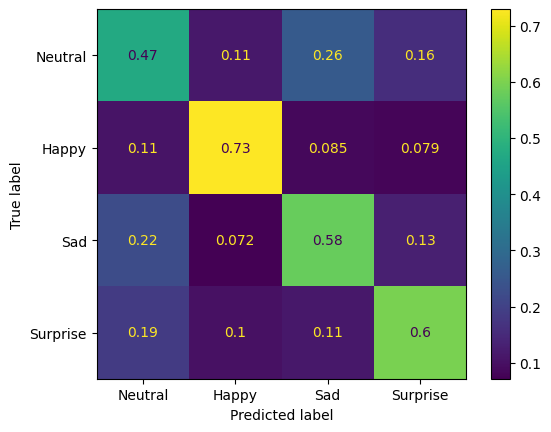

In [ ]:
predictions = cnn2.predict(test_images)
plotConfusionMatrix(predictions)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


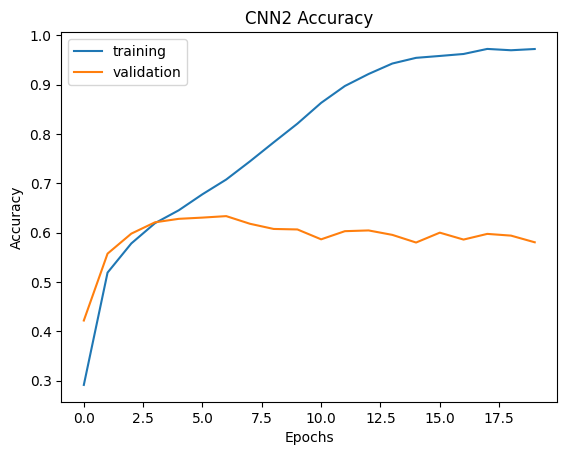

In [ ]:
plotAccuracyandLoss(history_cnn2, "CNN2")

# CNN 3

In [ ]:
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(100, 100, 1)))

cnn3.add(layers.MaxPooling2D((2, 2)))
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3.add(layers.MaxPooling2D((2, 2)))
cnn3.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn3.add(layers.Conv2D(128, (3, 3), activation='relu'))

cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(64, activation='relu'))
cnn3.add(layers.Dense(64, activation='relu'))
cnn3.add(layers.Dense(4, activation='softmax'))
cnn3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 95, 95, 32)        1184      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 43, 43, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 19, 19, 128)       73856     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 17, 17, 128)      

In [ ]:
cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_cnn3 = cnn3.fit(train_images, y_train_labels, epochs = 20, batch_size=64, verbose = True, validation_data = (test_images, y_test_labels))

Epoch 1/20
250/250 [==============================] - 8s 30ms/step - loss: 1.3864 - accuracy: 0.2567 - val_loss: 1.3774 - val_accuracy: 0.3050
Epoch 2/20
250/250 [==============================] - 7s 28ms/step - loss: 1.2051 - accuracy: 0.4414 - val_loss: 1.0682 - val_accuracy: 0.5318
Epoch 3/20
250/250 [==============================] - 7s 28ms/step - loss: 1.0356 - accuracy: 0.5493 - val_loss: 1.0258 - val_accuracy: 0.5462
Epoch 4/20
250/250 [==============================] - 7s 28ms/step - loss: 0.9607 - accuracy: 0.5909 - val_loss: 0.9317 - val_accuracy: 0.6045
Epoch 5/20
250/250 [==============================] - 7s 28ms/step - loss: 0.8909 - accuracy: 0.6233 - val_loss: 0.9188 - val_accuracy: 0.5993
Epoch 6/20
250/250 [==============================] - 7s 28ms/step - loss: 0.8312 - accuracy: 0.6526 - val_loss: 0.8808 - val_accuracy: 0.6270
Epoch 7/20
250/250 [==============================] - 7s 28ms/step - loss: 0.7717 - accuracy: 0.6844 - val_loss: 0.8845 - val_accuracy: 0.6258

In [ ]:
test_loss, test_acc = cnn3.evaluate(test_images, y_test_labels)

125/125 [==============================] - 1s 5ms/step - loss: 3.3288 - accuracy: 0.5748


In [ ]:
def plotConfusionMatrix(predictions):
  y_pred=np.argmax(predictions, axis=1)
  y_test=np.argmax(y_test_labels, axis=1)

  confusion_matrix = metrics.confusion_matrix(y_pred, y_test, normalize='true')

  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Neutral", "Happy", "Sad", "Surprise"])
  disp.plot()

  plt.savefig("CNN3.svg")
  plt.show()

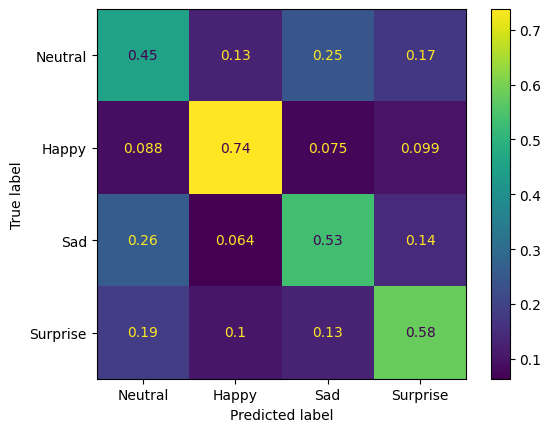

In [ ]:
predictions = cnn3.predict(test_images)
plotConfusionMatrix(predictions)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


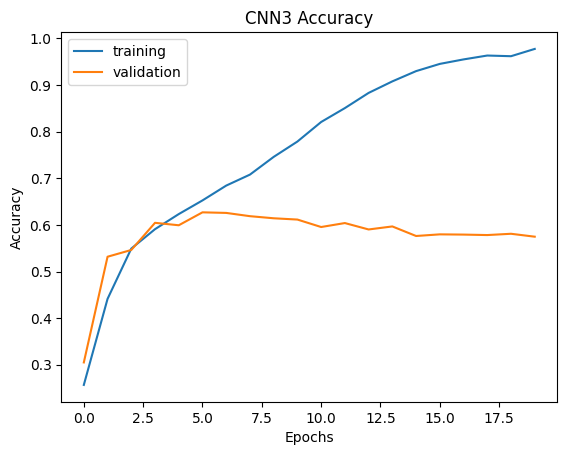

In [ ]:
plotAccuracyandLoss(history_cnn3, "CNN3")

In [ ]:
# model.save('baseline_model.h5')
# model_test.save('baseline_model.h5')
# cnn3.save('cnn3.h5')
# from google.colab import files
# files.download('cnn3.h5') 